In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, Lasso, LassoLarsCV
from sklearn.model_selection import cross_val_score


from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

#load the data and peek how it looks
train = pd.read_csv('train_df_processed.csv',index_col=None)
test = pd.read_csv('test_df_processed.csv',index_col=None)



X_train = train.drop("SalePrice", axis=1)
Y_train = train["SalePrice"]
X_test=test.drop("SalePrice", axis=1)

alldata=pd.concat((X_train,X_test))

display(X_test.head())

#last check for the data id there are nans
print('nans:',X_test.isnull().sum().sum())
print(np.shape(X_train))

,MSZoning_E,Street_E,Alley_E,LotShape_E,LandContour_E,Utilities_E,LotConfig_E,LandSlope_E,Neighborhood_E,Condition1_E,Condition2_E,BldgType_E,HouseStyle_E,RoofStyle_E,RoofMatl_E,Exterior1st_E,Exterior2nd_E,MasVnrType_E,ExterQual_E,ExterCond_E,Foundation_E,BsmtQual_E,BsmtCond_E,BsmtExposure_E,BsmtFinType1_E,BsmtFinType2_E,Heating_E,HeatingQC_E,CentralAir_E,Electrical_E,KitchenQual_E,Functional_E,FireplaceQu_E,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E,MSSubClass_E,EnclosedPorch_0,BsmtFinSF2_0,LowQualFinSF_0,WoodDeckSF_0,Fireplaces_0,3SsnPorch_0,PoolArea_0,MiscVal_0,ScreenPorch_0,OpenPorchSF_0,BsmtUnfSF_0,GarageArea_0,2ndFlrSF_0,TotalBsmtSF_0,MasVnrArea_0,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea
0,3.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,11.0,3.0,5.0,5.0,6.0,2.0,3.0,12.0,13.0,2.0,2.0,4.0,3.0,3.0,4.0,2.0,2.0,3.0,6.0,3.0,2.0,6.0,2.0,7.0,2.0,6.0,2.0,4.0,6.0,3.0,1.0,3.0,4.0,5.0,5.0,12.0,1,0,1,0,1,1,1,1,0,1,0,0,1,0,1,11622,5,6,1961,1961,0.0,468.0,882.0,896,0,896,0.0,1,0,2,1,5,1.0,730.0
1,4.0,2.0,3.0,2.0,2.0,2.0,3.0,1.0,11.0,5.0,5.0,5.0,6.0,5.0,3.0,6.0,5.0,3.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,6.0,6.0,3.0,2.0,6.0,3.0,7.0,2.0,6.0,2.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,5.0,12.0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,14267,6,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,0.0,1,1,3,1,6,1.0,312.0
2,4.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,15.0,5.0,5.0,5.0,7.0,2.0,3.0,12.0,13.0,2.0,2.0,4.0,6.0,4.0,4.0,2.0,7.0,6.0,6.0,4.0,2.0,6.0,2.0,7.0,4.0,6.0,4.0,4.0,6.0,3.0,1.0,3.0,4.0,5.0,5.0,15.0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,1,13830,5,5,1997,1998,0.0,791.0,928.0,928,701,1629,0.0,2,1,3,1,6,2.0,482.0
3,4.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,15.0,5.0,5.0,5.0,7.0,2.0,3.0,12.0,13.0,3.0,2.0,4.0,6.0,3.0,4.0,2.0,7.0,6.0,6.0,5.0,2.0,6.0,3.0,7.0,5.0,6.0,4.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0,15.0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,9978,6,6,1998,1998,20.0,602.0,926.0,926,678,1604,0.0,2,1,3,1,7,2.0,470.0
4,4.0,2.0,3.0,2.0,4.0,2.0,1.0,1.0,23.0,5.0,5.0,4.0,6.0,2.0,3.0,9.0,10.0,2.0,3.0,4.0,6.0,4.0,4.0,2.0,5.0,6.0,6.0,5.0,2.0,6.0,3.0,7.0,2.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0,14.0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,5005,8,5,1992,1992,0.0,263.0,1280.0,1280,0,1280,0.0,2,0,2,1,5,2.0,506.0


nans: 0
(1460, 78)


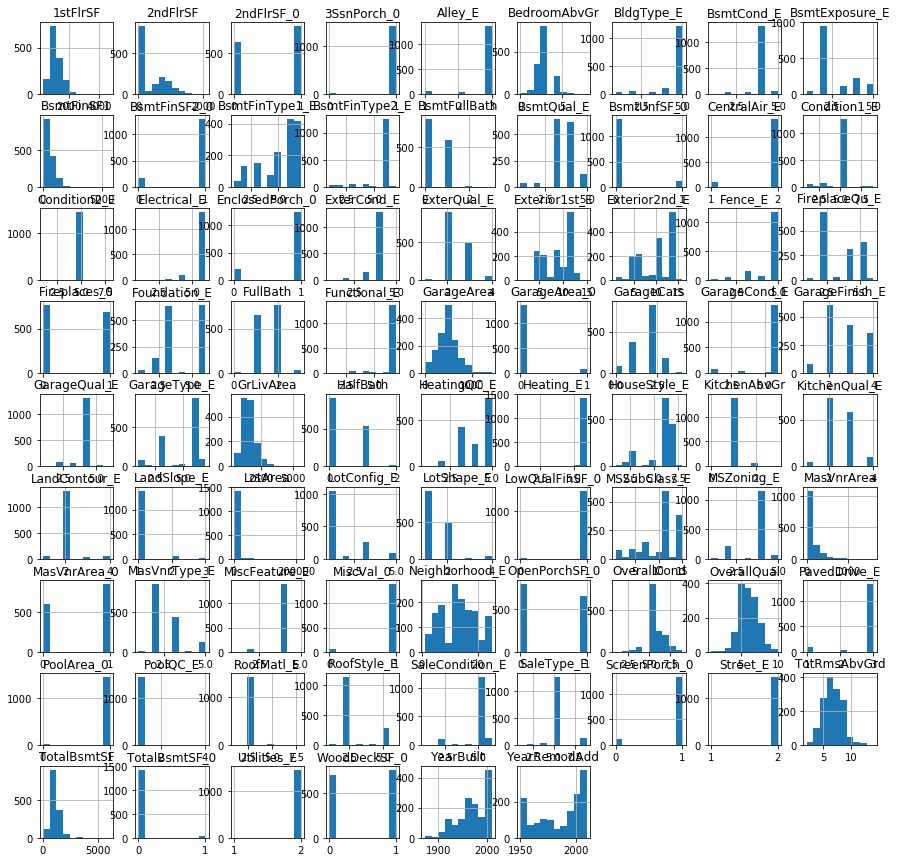

In [2]:
X_train.hist(figsize=(15,15));
plt.show()

In [3]:
#do a logarithmic transformation for following variables=
logtrans=['1stFlrSF','2ndFlrSF','BsmtFinSF1','GrLivArea','YearBuilt','TotalBsmtSF']

alldata[logtrans]=np.log1p(alldata[logtrans])
Y_train=np.log1p(Y_train.values)

In [4]:
# Simple logirstic regression
from sklearn.model_selection import KFold
linreg = LinearRegression()
linreg.fit(X_train.values[:], Y_train) #calculate the parameters

for i in range(5):
    kfold=KFold(n_splits=4, shuffle=True) #random_state=None)
    print('CV scores:',np.sqrt(-cross_val_score(linreg, X_train, Y_train, scoring="neg_mean_squared_error", cv = kfold))) 


coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Linreg_coeff"] = pd.Series(linreg.coef_)

#highly unstable results, sign of overfitting

CV scores: [ 0.22234549  0.11161974  0.14169129  0.13023929]
CV scores: [ 0.13043368  0.21717566  0.13389772  0.12796239]
CV scores: [ 0.10744745  0.18878587  0.15289798  0.17435361]
CV scores: [ 0.12486605  0.19118117  0.14199406  0.14178219]
CV scores: [ 0.13005121  0.17142641  0.13115742  0.15022429]


In [5]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

# create the RFE model and check for 50% of the useful variable
rfe = RFE(linreg)
rfe = rfe.fit(X_train, Y_train)
rfe_logreg=list(X_train.columns[~rfe.support_])
coeff_df["RFE_Ranking"]=~rfe.ranking_
display(coeff_df.sort_values(by="Linreg_coeff",ascending=False))

#try scores by taking only features with better than -25 ranking

varlist=list(coeff_df.loc[coeff_df['RFE_Ranking']>-35]['Feature'])



rfe = rfe.fit(X_train[varlist], Y_train)
for i in range(5):
    kfold=KFold(n_splits=4, shuffle=True) #random_state=None)
    print('CV scores:',np.sqrt(-cross_val_score(rfe, X_train[varlist], Y_train, scoring="neg_mean_squared_error", cv = kfold)))


#seems bit more stable but still relatively low scores

,Feature,Linreg_coeff,RFE_Ranking
50,PoolArea_0,0.737105,-2
38,PoolQC_E,0.320735,-2
5,Utilities_E,0.309737,-2
46,LowQualFinSF_0,0.114987,-2
1,Street_E,0.113675,-2
57,TotalBsmtSF_0,0.083882,-2
55,GarageArea_0,0.074834,-2
28,CentralAir_E,0.064850,-2
60,OverallQual,0.053096,-2
76,GarageCars,0.048489,-2


CV scores: [ 0.15124616  0.17599198  0.14871869  0.15255679]
CV scores: [ 0.16252659  0.17196767  0.15278547  0.14171189]
CV scores: [ 0.14941851  0.14695742  0.18308747  0.15042184]
CV scores: [ 0.15209946  0.16327388  0.1563657   0.15732108]
CV scores: [ 0.15182276  0.19251772  0.1499251   0.13850378]


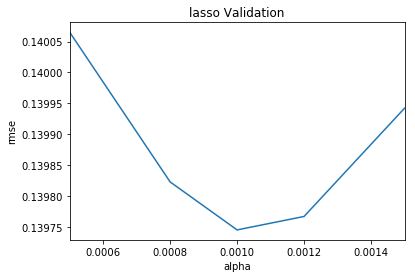

In [6]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

alphas = [0.0005, 0.0008,0.001,0.0012,0.0015]
cv_lasso = [rmse_cv(Lasso(alpha = alpha,max_iter=10000)).mean() 
            for alpha in alphas]

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "lasso Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")



In [14]:
#do parameter search on Lasso and ridge
from sklearn.metrics import make_scorer
lasso=Lasso(max_iter=10000)

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True,
#cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)[source]¶

# Choose some parameter combinations to try
parameters = {'alpha': [0.0005, 0.0008,0.001,0.0012,0.0015]
             }

# Run the grid search
#for i in range(5):
kfold=KFold(n_splits=4, shuffle=True) #random_state=None)
    
grid_obj = GridSearchCV(lasso, parameters,verbose=0, scoring="neg_mean_squared_error",cv=kfold)
grid_obj = grid_obj.fit(X_train, Y_train)

results=pd.DataFrame(grid_obj.cv_results_)
results['mean_test_score']=np.sqrt(-results['mean_test_score'].values)
display(results)

lasso = grid_obj.best_estimator_


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.061166,0.000627,0.144110,-0.015372,0.0005,{'alpha': 0.0005},4,-0.020185,-0.015351,-0.019884,-0.015346,-0.029513,-0.013578,-0.013488,-0.017210,0.009980,0.000416,0.005714,0.001284
1,0.053267,0.000502,0.143822,-0.015619,0.0008,{'alpha': 0.0008},1,-0.019912,-0.015571,-0.019648,-0.015665,-0.029726,-0.013745,-0.013453,-0.017494,0.016523,0.000355,0.005825,0.001326
2,0.048880,0.000753,0.143913,-0.015740,0.001,{'alpha': 0.001},2,-0.019790,-0.015739,-0.019619,-0.015800,-0.029973,-0.013838,-0.013462,-0.017582,0.013755,0.000435,0.005924,0.001324
3,0.050577,0.000499,0.144075,-0.015827,0.0012,{'alpha': 0.0012},3,-0.019734,-0.015841,-0.019579,-0.015882,-0.030238,-0.013933,-0.013478,-0.017652,0.014671,0.000499,0.006027,0.001316
4,0.047628,0.000502,0.144353,-0.015950,0.0015,{'alpha': 0.0015},5,-0.019666,-0.015960,-0.019522,-0.016008,-0.030656,-0.014071,-0.013507,-0.017760,0.012085,0.000502,0.006189,0.001305


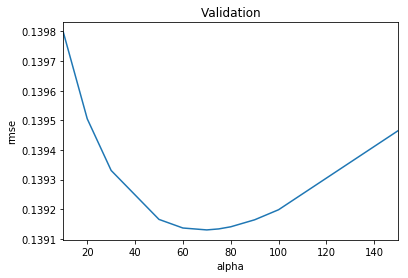

In [8]:
alphas = [10, 20 ,30, 50, 60, 70,75,80,90,100,150]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [13]:
#do parameter search on Lasso and ridge
from sklearn.metrics import make_scorer
ridge=Ridge()

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True,
#cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)[source]¶

# Choose some parameter combinations to try
parameters = {'alpha':[10, 20 ,30, 50, 60, 70,75,80,90,100,150]            
             }

# Run the grid search
#for i in range(5):
kfold=KFold(n_splits=4, shuffle=True) #random_state=None)
    
grid_obj = GridSearchCV(ridge, parameters,verbose=0, scoring="neg_mean_squared_error",cv=kfold)
grid_obj = grid_obj.fit(X_train, Y_train)

results=pd.DataFrame(grid_obj.cv_results_)
results['mean_test_score']=np.sqrt(-results['mean_test_score'].values)
display(results)

ridge = grid_obj.best_estimator_


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.002757,0.000752,0.141197,-0.015338,10,{'alpha': 10},11,-0.017734,-0.015687,-0.013614,-0.017126,-0.032581,-0.012230,-0.015817,-0.016307,0.000831,4.341185e-04,0.007445,0.001865
1,0.002757,0.000752,0.140753,-0.015464,20,{'alpha': 20},10,-0.017527,-0.015835,-0.013531,-0.017257,-0.032703,-0.012299,-0.015484,-0.016465,0.000433,4.340486e-04,0.007576,0.001896
2,0.003385,0.000376,0.140516,-0.015557,30,{'alpha': 30},8,-0.017405,-0.015941,-0.013480,-0.017351,-0.032854,-0.012351,-0.015240,-0.016584,0.000652,4.153748e-04,0.007695,0.001917
3,0.002508,0.000376,0.140313,-0.015710,50,{'alpha': 50},5,-0.017269,-0.016113,-0.013432,-0.017505,-0.033153,-0.012439,-0.014897,-0.016784,0.000616,4.157162e-04,0.007894,0.001952
4,0.003258,0.000252,0.140284,-0.015779,60,{'alpha': 60},2,-0.017229,-0.016188,-0.013424,-0.017574,-0.033295,-0.012478,-0.014770,-0.016874,0.000435,4.357688e-04,0.007978,0.001967
5,0.004512,0.000752,0.140284,-0.015843,70,{'alpha': 70},1,-0.017200,-0.016258,-0.013423,-0.017640,-0.033431,-0.012516,-0.014663,-0.016959,0.001121,4.340137e-04,0.008056,0.001982
6,0.003259,0.000501,0.140292,-0.015875,75,{'alpha': 75},3,-0.017188,-0.016292,-0.013425,-0.017672,-0.033498,-0.012535,-0.014616,-0.017000,0.000434,5.009175e-04,0.008092,0.001989
7,0.003510,0.000752,0.140304,-0.015905,80,{'alpha': 80},4,-0.017178,-0.016325,-0.013428,-0.017703,-0.033562,-0.012553,-0.014572,-0.017040,0.000353,2.487403e-04,0.008127,0.001996
8,0.003010,0.001002,0.140340,-0.015964,90,{'alpha': 90},6,-0.017163,-0.016388,-0.013436,-0.017763,-0.033688,-0.012588,-0.014494,-0.017118,0.000711,6.078505e-07,0.008192,0.002009
9,0.002507,0.000751,0.140387,-0.016022,100,{'alpha': 100},7,-0.017151,-0.016449,-0.013447,-0.017822,-0.033810,-0.012622,-0.014427,-0.017193,0.000501,4.336708e-04,0.008254,0.002022


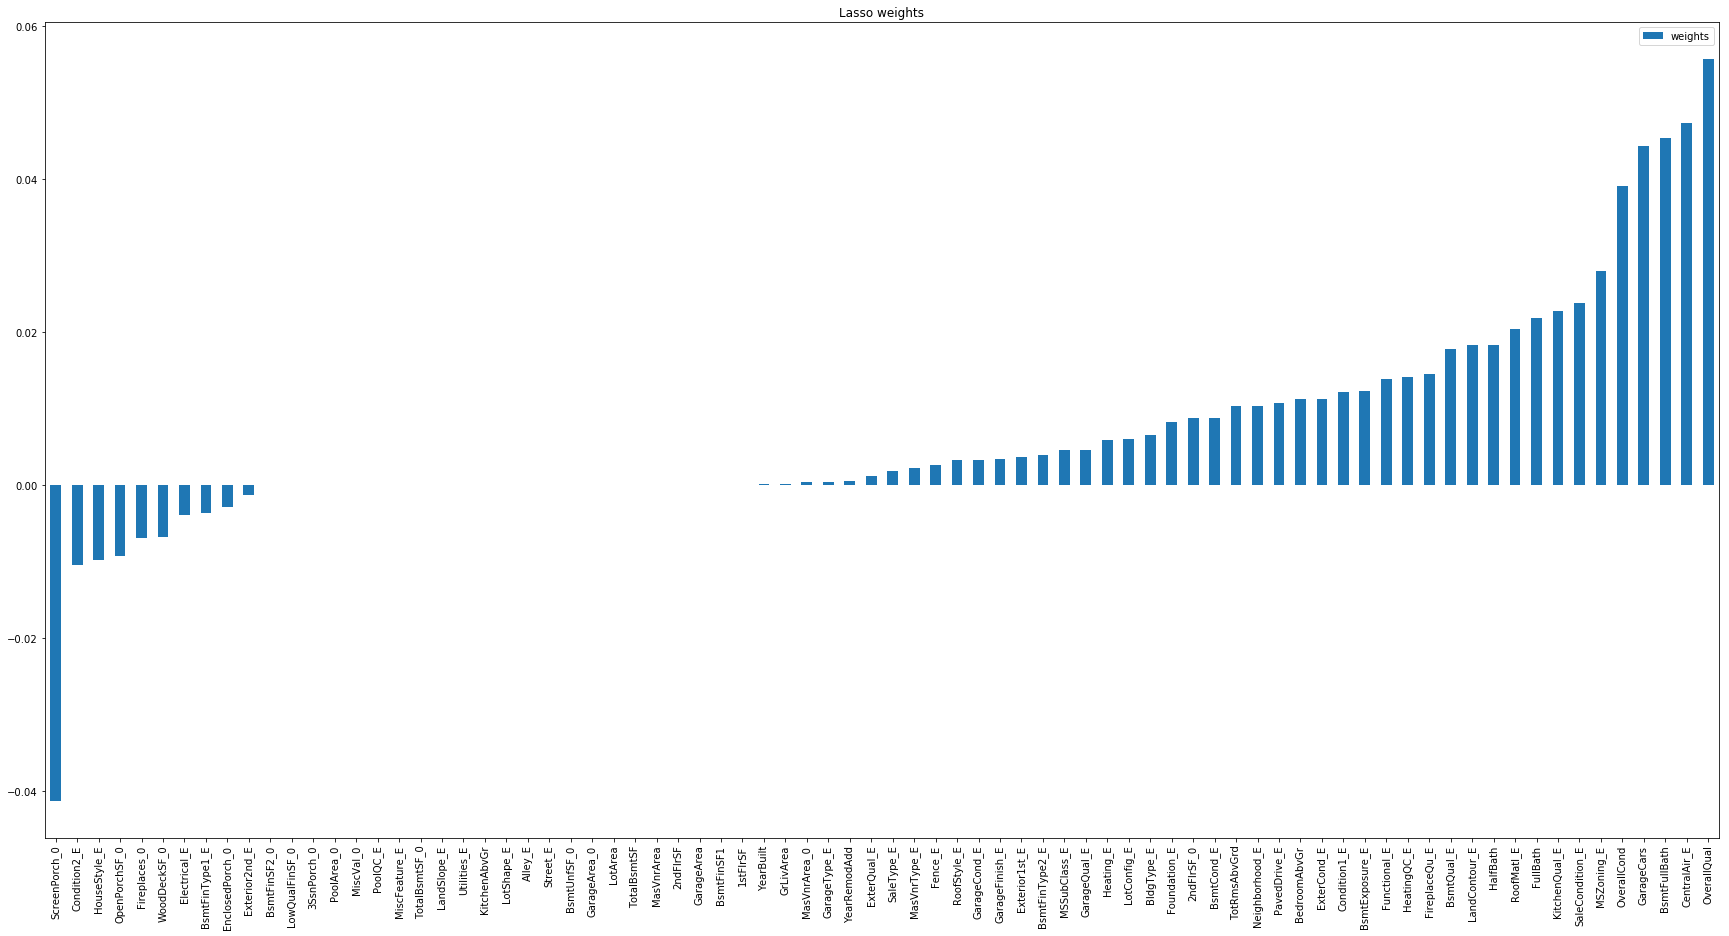

In [15]:
#check lasso coefficients
coef = pd.DataFrame(lasso.coef_, index = X_train.columns,columns=['weights'])

#coeff = pd.DataFrame({'Feature' : X_train.columns},{'weights' : lasso.coef_})


f, ax = plt.subplots(figsize=(30, 15)) 
plt.title('Lasso weights')
coef.sort_values(by="weights").plot.bar(ax=ax)

#f, (ax1,ax2)=plt.subplots(2,figsize=(12, 15)) 
#ax1.set_xticklabels(ax1.xaxis.get_ticklabels(),rotation=90)
#sns.barplot(data=correlations, x='Feature', y='CorrSP',ax=ax1

#save the coefficients in same format as others
coef=pd.DataFrame()
coef['Feature']=X_train.columns
coef['weights']=lasso.coef_
coef.to_csv('lasso_coef.csv')


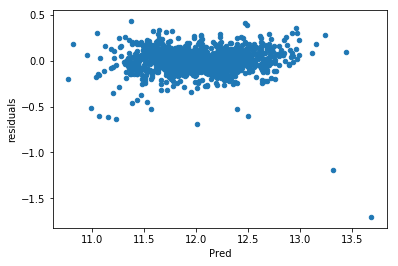

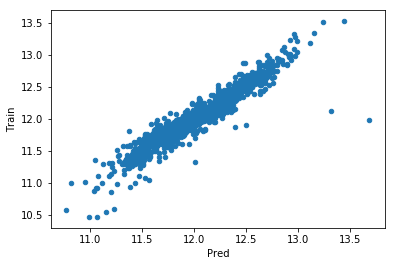

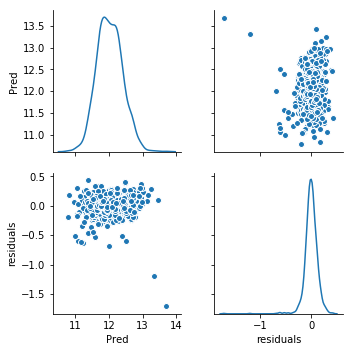

In [16]:
#check how the residuals act
res = pd.DataFrame({"Pred":lasso.predict(X_train), "Train":Y_train})
res["residuals"] = res["Train"] - res["Pred"]
res.plot(x = "Pred", y = "residuals",kind = "scatter")
res.plot(x = "Pred", y = "Train",kind = "scatter")

g = sns.pairplot(res,x_vars=['Pred','residuals'],y_vars=['Pred','residuals'], diag_kind="kde")

In [17]:
#nothing so badly wrong here but more feature engineering is needed
#the submission of the mean of lasso, ridge and linear regression
Y_pred=np.exp((lasso.predict(X_test)+ridge.predict(X_test))/2)

#our submission will be the mode
submission = pd.DataFrame({
        "Id": list(range(1461,2920)),
        "SalePrice": Y_pred
    })
submission.to_csv('submission.csv', index=False)


In [ ]:
#yields score of 13.083, which is better than average score, but should be quite easily improved by performing
#some feature selection & engineering, also probably some segmented regression could become handy